In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 128
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

In [3]:
class SimpleVAE:
    def __init__(self, input_shape, encoding_dim):
        model = tf.keras.models.Sequential()
        model.add(
            tf.keras.layers.Dense(
                encoding_dim, activation="relu", input_shape=(input_shape, ), name='decoder_output'
            )
        )
        model.add(tf.keras.layers.Dense(input_shape, activation="sigmoid"))
        self.model = model

    def compile(self, optimizer, loss):
        self.model.compile(optimizer=optimizer, loss=loss)

    def summary(self):

        return self.model.summary()

    def fit(self, train_x, train_y, epochs, batch_size, validation_split):
        EaryStopping = tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, mode="min"
        )
        self.model.fit(
            train_x,
            train_y,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.1,
            callbacks=[EaryStopping],
        )
        
        
    def predict(self, test_x):
        return self.model.predict(test_x)

In [4]:
def load_data():
    (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
    train_x = train_x.astype('float32') / 255.
    test_x = test_x.astype('float32') / 255.
    train_x = train_x.reshape(train_x.shape[0], -1)
    test_x = test_x.reshape(test_x.shape[0], -1)
    return train_x, test_x

In [5]:
train_x, test_x = load_data()

In [6]:
model = SimpleVAE(train_x.shape[1], 256)
model.compile(optimizer='adam',
                  loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_output (Dense)       (None, 256)               200960    
_________________________________________________________________
dense (Dense)                (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(train_x, train_x, epochs, batch_size, 0.3)

Epoch 1/50
422/422 [==============================] - 1s 3ms/step - loss: 0.1519 - val_loss: 0.0944
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0838 - val_loss: 0.0775
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0739 - val_loss: 0.0722
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0703 - val_loss: 0.0698
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0685 - val_loss: 0.0685
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0667 - val_loss: 0.0671
Epoch 8/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0662 - val_loss: 0.0666
Epoch 9/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0658 - val_loss: 0.0662
Epoch 10/50
422/422 [==============================] - 1s 3ms/step - loss: 0.0655 - val_loss: 0.0660

In [8]:
score = model.model.evaluate(test_x, test_x, verbose=0)
print('test xentropy:', score)

test xentropy: 0.0637810006737709


In [9]:
def show_result(model, n_sample, input_shape, output_shape):
    bases = test_x[np.random.randint(0, len(test_x), n_sample)]
    results = model.predict(bases)
    fig = plt.figure(figsize=(10.0, 4.0))
    for i in range(n_sample):
        ax1 = plt.subplot(2, n_sample, i + 1)
        ax2 = plt.subplot(2, n_sample, i + n_sample + 1)
        ax1.imshow(bases[i].reshape(input_shape))
        ax2.imshow(results[i].reshape(output_shape))

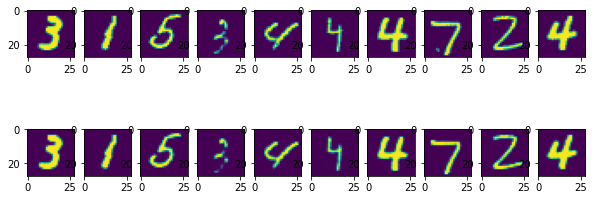

In [10]:
show_result(model, 10, (28, 28), (28, 28))

In [11]:
encoder = tf.keras.models.clone_model(model.model)
encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
encoder.set_weights(model.model.get_weights())
encoder.pop()

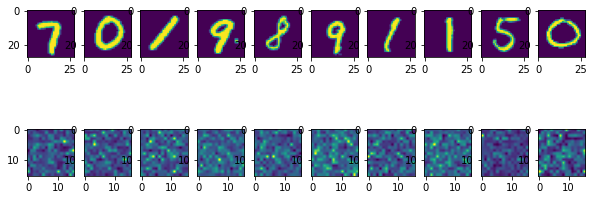

In [12]:
show_result(encoder, 10, (28, 28), (16, 16))